In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
data = pd.read_csv('train.csv', index_col='PassengerId')
data.dropna().head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,1,"Wardlaw, Michael",male,27.0,2,1,474849,73.02,A7253,S
9,0,2,"Greigo, Rudy",male,66.0,0,0,6981,9.14,D2969,C
11,0,1,"Telschow, Robert",male,60.0,0,0,19600,31.50,A9055,S
12,0,3,"Stewart, Pat",male,36.0,0,0,434108,9.34,C8674,S
14,1,1,"Seaton, Karen",female,44.0,0,1,12425,28.40,D6945,C
19,1,1,"Hall, Stephanie",female,61.0,0,4,PC 174821,205.01,B7010,Q
25,0,1,"Dagostino, Christa",female,53.0,1,1,11856,82.57,B11790,Q
27,1,1,"Way, Tina",female,35.0,0,2,476162,154.61,C20297,C
33,1,1,"Roth, Pamela",female,67.0,1,0,448145,97.20,B16390,Q


In [127]:
titanic = pd.read_csv('train.csv')
# titanic.info()
titanic_cleaned = titanic.dropna()
# titanic_cleaned.info()
surv = titanic[titanic.Survived == 1]

In [134]:
#male or female
sns.set(style='darkgrid', font_scale=2)  
sex = titanic[['Survived','Sex']]
# g = sns.relplot(x='Age', y='Fare', data=titanic,
#             row='Pclass',
#             hue='Sex',
#             aspect=1.5,
#                 s=3,
#                 palette=['black', 'red'],
#                 style='Survived',
#                 markers=['X', 'o']
#            );
# g.set_titles(row_template="{row_name} Class")
# g.set_xlabels('Passenger Age')
# g.set_ylabels('Fare')
# leg = g._legend
# leg.set_title('Survived');

In [238]:
male = len(sex[(sex.Sex=='male')&(sex.Survived==1)])/len(sex[sex.Sex=='male'])
female = len(sex[(sex.Sex=='female')&(sex.Survived==1)])/len(sex[sex.Sex=='female'])
print(f"Male survived to all males ratio {male}. Female survived to all ratio {female}")
# sns.relplot(data=[male, female], kind='line')

Male survived to all males ratio 0.20579534519014864. Female survived to all ratio 0.7115253155903933


In [140]:
sex['Sex'].str.get_dummies().corrwith(sex['Survived']/sex['Survived'].max())

female    0.50726
male     -0.50726
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Survived'>

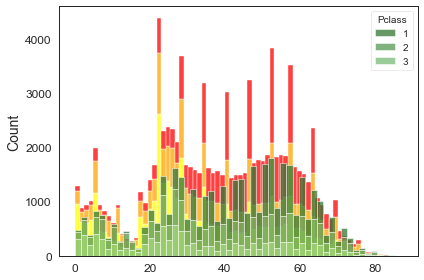

<Figure size 1080x720 with 0 Axes>

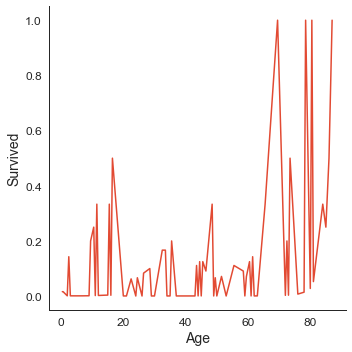

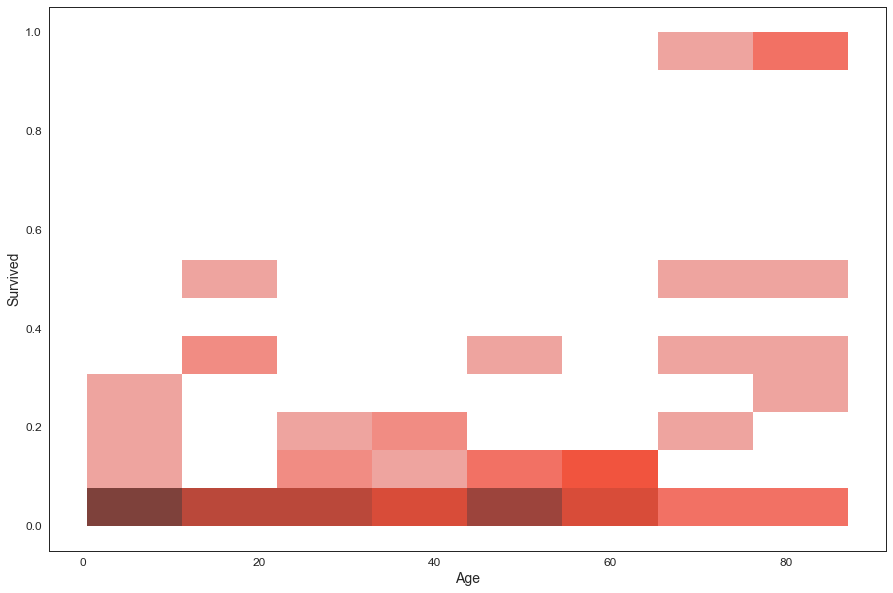

In [129]:
age_surv_all = titanic[['Survived','Age']].dropna()
age_distribution = age_surv_all.groupby('Age').count().reset_index()

age_surv = age_surv_all[age_surv_all.Survived == 1]

age_surv_distribution = age_surv.groupby('Age').count().reset_index()

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)
sns.set_style('white')

sns.histplot(data=titanic, x='Age', hue='Pclass', multiple='stack'\
             , palette=['red','orange','yellow'])
sns.histplot(data=surv, x='Age', hue='Pclass', multiple='stack', palette=['#373','#595','#7B7'])

plt.xlabel('')
plt.tight_layout();

age_surv_percentage = age_surv['Survived']/age_distribution['Survived']
plt.figure(2, figsize=(15,10));

df=pd.DataFrame({'Age': age_distribution['Age'] , 'Survived': age_surv_percentage})

sns.relplot(data=df, x='Age', y='Survived', kind='line')
nans = data[data.Age.isnull()]
plt.figure(4, figsize=(15,10));
sns.histplot(data=df, x='Age', y='Survived')

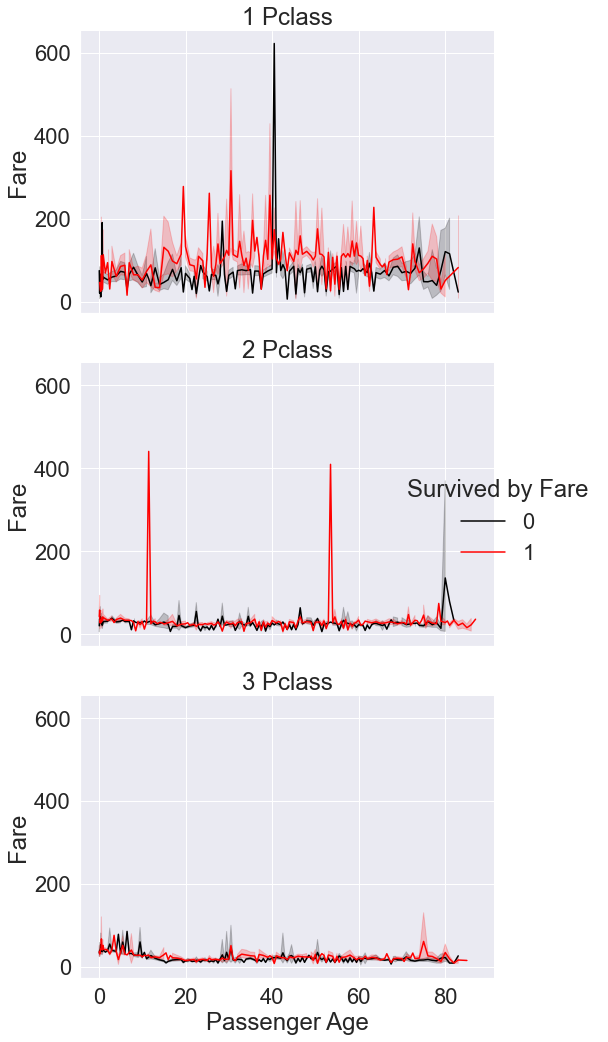

In [143]:
sns.set(style='darkgrid', font_scale=2)  

g = sns.relplot(x='Age', y='Fare', data=titanic,
            row='Pclass',
            hue='Survived',
            aspect=1.5,
                kind='line',
                palette=['black', 'red']
           );
g.set_titles(row_template="{row_name} Pclass")
g.set_xlabels('Passenger Age')
g.set_ylabels('Fare')
leg = g._legend
leg.set_title('Survived by Fare');

<Figure size 432x288 with 0 Axes>

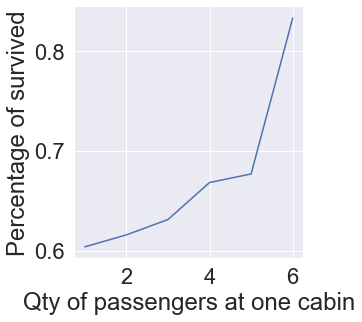

In [215]:
titanic['Survived'].corr(titanic['Fare'])
t = titanic[['Cabin','Survived']].groupby('Cabin').count()
# t = t[t.Survived>1].reset_index()
t = t.reset_index()
t.rename(columns={'Cabin':'Cabin','Survived':'Qty'}, inplace=True)
t = t.merge(titanic[['Survived','Cabin']], on='Cabin')
c = t[t.Survived==1].groupby('Qty').count()
d = t.groupby('Qty').count()
e = c['Survived']/d['Survived']

# print(t)
# print(d)
# print(c)
# print(e)
# sns.histplot(data=t, x='Qty', hue='Survived', palette='Reds', multiple='stack')
plt.figure(2);
g = sns.relplot(data=e, kind='line');
g.set_xlabels('Qty of passengers at one cabin')
g.set_ylabels('Percentage of survived')

   Survived  Pclass              Name   Sex    Age  SibSp  Parch     Ticket  \
0         1       1  Oconnor, Frankie  male    NaN      2      0     209245   
1         0       3       Bryan, Drew  male    NaN      0      0      27323   
2         0       3    Owens, Kenneth  male   0.33      1      2  CA 457703   
3         0       3     Kramer, James  male  19.00      0      0   A. 10866   
4         1       3     Bond, Michael  male  25.00      0      0     427635   

    Fare   Cabin Embarked  
0  27.14  C12239        S  
1  13.35     NaN        S  
2  71.29     NaN        S  
3  13.04     NaN        S  
4   7.76     NaN        S  


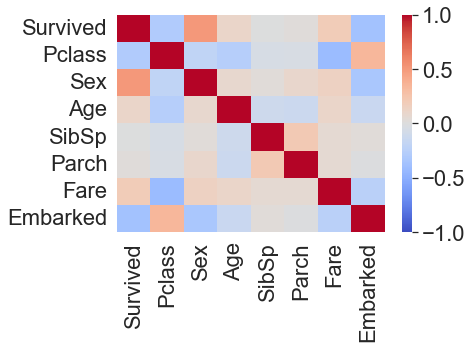

In [269]:
data = titanic.drop(['PassengerId'], axis=1)
# sns.heatmap(data.corr())
genders = {"male": 0, "female": 1}
embarked = {"C":0, "Q":1, "S":2}
print(data.head())
# for dataset in data:
data['Sex'] = data['Sex'].map(genders)
data['Embarked'] = data['Embarked'].map(embarked)
sns.heatmap(data.corr(), fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
#     print(dataset)
#     dataset['Survived'] = dataset['Survived'].map(genders)

plt.show()

   Parch    Qty
0      0  73540
1      1  12996
2      2  11236
3      3    983
4      4    446
5      5    331
6      6    204
7      9    264
       Survived
Parch          
0         29799
1          7694
2          4323
3           484
4           127
5           189
6            42
9           116
0    0.405208
1    0.592028
2    0.384745
3    0.492370
4    0.284753
5    0.570997
6    0.205882
7         NaN
9         NaN
dtype: float64


<Figure size 432x288 with 0 Axes>

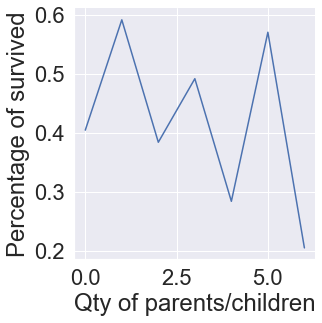

In [252]:
t = titanic[['Parch','Survived']].groupby('Parch').count()
# t = t[t.Survived>1].reset_index()
t = t.reset_index()
t.rename(columns={'Parch':'Parch','Survived':'Qty'}, inplace=True)
a = titanic[['Parch','Survived']][titanic.Survived==1].groupby('Parch').count()
# t = t.merge(titanic[['Survived','Parch']], on='Parch')
# c = t[t.Survived==1].groupby('Qty').count()
# d = t.groupby('Qty').count()
e = a['Survived']/t['Qty']

print(t)
print(a)
# print(c)
print(e)
# sns.histplot(data=t, x='Qty', hue='Survived', palette='Reds', multiple='stack')
plt.figure(2);
g = sns.relplot(data=e, kind='line');
g.set_xlabels('Qty of parents/children')
g.set_ylabels('Percentage of survived')

   SibSp    Qty
0      0  73308
1      1  19758
2      2   3703
3      3   1635
4      4   1168
5      5    132
6      8    296
       Survived
SibSp          
0         31291
1          8570
2          1681
3           654
4           439
5            25
8           114
0    0.426843
1    0.433748
2    0.453956
3    0.400000
4    0.375856
5    0.189394
6         NaN
8         NaN
dtype: float64


<Figure size 432x288 with 0 Axes>

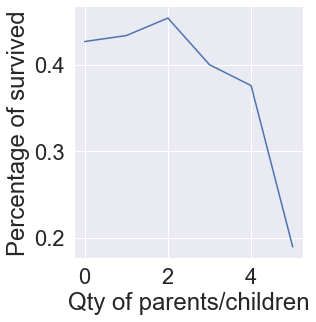

In [260]:
t = titanic[['SibSp','Survived']].groupby('SibSp').count()
# t = t[t.Survived>1].reset_index()
t = t.reset_index()
t.rename(columns={'SibSp':'SibSp','Survived':'Qty'}, inplace=True)
a = titanic[['SibSp','Survived']][titanic.Survived==1].groupby('SibSp').count()
# t = t.merge(titanic[['Survived','Parch']], on='Parch')
# c = t[t.Survived==1].groupby('Qty').count()
# d = t.groupby('Qty').count()
e = a['Survived']/t['Qty']

print(t)
print(a)
# print(c)
print(e)
# sns.histplot(data=t, x='Qty', hue='Survived', palette='Reds', multiple='stack')
plt.figure(2);
g = sns.relplot(data=e, kind='line');
g.set_xlabels('Qty of siblings/spouses')
g.set_ylabels('Percentage of survived')

  Embarked    Qty
0        C  22187
1        Q   5424
2        S  72139
  Embarked  Survived
0        C     16669
1        Q      3238
2        S     22745


<Figure size 432x288 with 0 Axes>

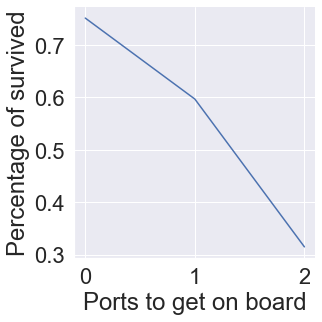

In [270]:
t = titanic[['Embarked','Survived']].groupby('Embarked').count()
# t = t[t.Survived>1].reset_index()
t = t.reset_index()
t.rename(columns={'Embarked':'Embarked','Survived':'Qty'}, inplace=True)
a = titanic[['Embarked','Survived']][titanic.Survived==1].groupby('Embarked').count()
a = a.reset_index()
# t = t.merge(titanic[['Survived','Parch']], on='Parch')
# c = t[t.Survived==1].groupby('Qty').count()
# d = t.groupby('Qty').count()
e = a['Survived']/t['Qty']

print(t)
print(a)
# print(c)
# print(e)
# sns.histplot(data=t, x='Qty', hue='Survived', palette='Reds', multiple='stack')
plt.figure(2);
g = sns.relplot(data=e, kind='line');
g.set_xlabels('Ports to get on board')
g.set_ylabels('Percentage of survived')

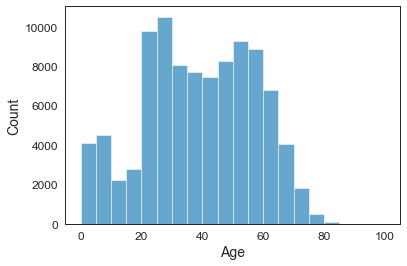

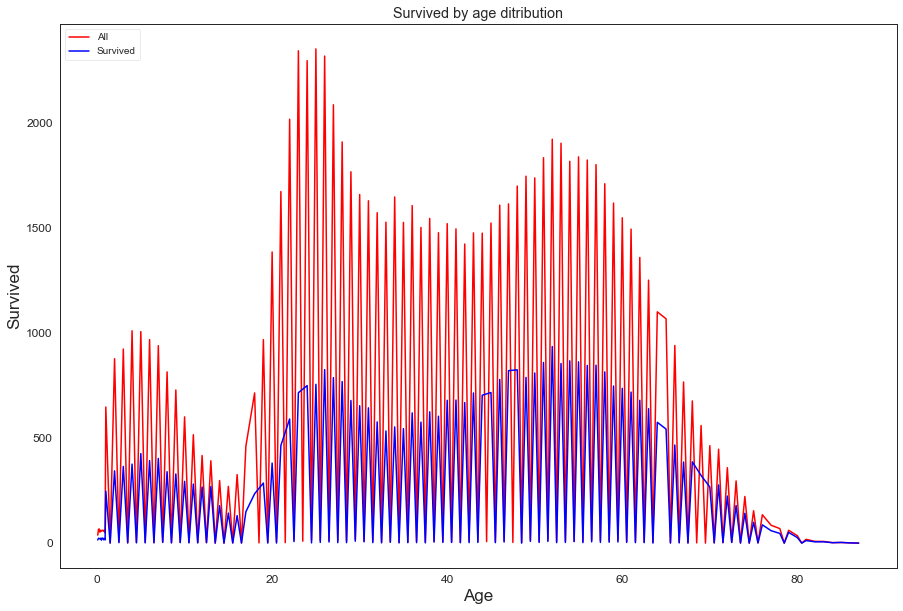

In [35]:
# print(pd.__version__)
sns.histplot(x='Age', data=age_surv_all, 
             binwidth=5, binrange=(0, 100)
            );

plt.figure(2, figsize=(15,10));
plt.plot(age_distribution['Age'], age_distribution['Survived'], 'r');
plt.plot(age_surv_distribution['Age'], age_surv_distribution['Survived'], 'b');
# plt.plot(t, yexact, 'b--')
plt.legend(['All','Survived'], loc=2)
plt.title('Survived by age ditribution')
plt.xlabel('Age', fontsize=17)
plt.ylabel('Survived', fontsize=17);

# plt.figure(2, figsize=(10,5))
# plt.semilogy (t, abs(diff))
# plt.legend(["|Error|"], loc=1)
# plt.title('Error of ODE by ABM')
# plt.xlabel('x', fontsize=17)
# plt.ylabel('|error|', fontsize=17)

# plt.figure(3, figsize=(10,5))
# plt.plot(tb, yb, 'r')
# plt.plot(t, yexact, 'b--')
# plt.xlim(xspan[0], xspan[1])
# plt.legend(["Burst ", "Exact solution"], loc=2)
# plt.title('Burst of ODE')
# plt.xlabel('t', fontsize=17)
# plt.ylabel('y', fontsize=17)

# plt.tight_layout()
# plt.show()

# Context

# Data quality assessment

# Data exploration

# Summary